In [20]:
import requests
import os

# Step 1: Set up the Pexels API Key and Headers
API_KEY = "J7It4MBq37ztg1YRrfiU91fjlMkkDXViK8Z6llbPsBHFoO7KnDI9E6c6"  # Replace with your own API, I used my personal APi here

# Set up headers for API authentication
headers = {
    "Authorization": API_KEY
}

print("API headers are set up and ready.")

API headers are set up and ready.


In [21]:
# Step 2: Function to download videos from Pexels
def download_videos(query, num_videos=10, output_dir="pexels_videos"):
    # Create directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Define the search parameters
    params = {
        "query": query,
        "per_page": num_videos
    }
    
    # Send request to Pexels API to search for videos
    response = requests.get("https://api.pexels.com/videos/search", headers=headers, params=params)
    data = response.json()
    
    # Check if 'videos' exists in the response
    if 'videos' not in data:
        print("No videos found for the query.")
        return
    
    # Loop through the results and download videos
    for index, video in enumerate(data['videos']):
        video_url = video['video_files'][0]['link']
        video_data = requests.get(video_url).content
        video_filename = os.path.join(output_dir, f"{query}_video_{index + 1}.mp4")
        
        with open(video_filename, 'wb') as video_file:
            video_file.write(video_data)
        
        print(f"Downloaded {video_filename}")

In [22]:
# Step 3: Function to download images from Pexels
def download_images(query, num_images=10, output_dir="pexels_images"):
    # Create directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Define the search parameters
    params = {
        "query": query,
        "per_page": num_images
    }
    
    # Send request to Pexels API to search for images
    response = requests.get("https://api.pexels.com/v1/search", headers=headers, params=params)
    data = response.json()
    
    # Loop through the results and download images
    for index, photo in enumerate(data['photos']):
        image_url = photo['src']['original']
        image_data = requests.get(image_url).content
        image_filename = os.path.join(output_dir, f"{query}_{index + 1}.jpg")
        
        with open(image_filename, 'wb') as image_file:
            image_file.write(image_data)
        
        print(f"Downloaded {image_filename}")

In [23]:
# Step 4: Download "nature" images and videos, can modify according to the need by replacing "nature" to "city","forest","mountain" etc
download_images("mountain", num_images=10)
download_videos("nature", num_videos=5)

Downloaded pexels_images/mountain_1.jpg
Downloaded pexels_images/mountain_2.jpg
Downloaded pexels_images/mountain_3.jpg
Downloaded pexels_images/mountain_4.jpg
Downloaded pexels_images/mountain_5.jpg
Downloaded pexels_images/mountain_6.jpg
Downloaded pexels_images/mountain_7.jpg
Downloaded pexels_images/mountain_8.jpg
Downloaded pexels_images/mountain_9.jpg
Downloaded pexels_images/mountain_10.jpg
Downloaded pexels_videos/nature_video_1.mp4
Downloaded pexels_videos/nature_video_2.mp4
Downloaded pexels_videos/nature_video_3.mp4
Downloaded pexels_videos/nature_video_4.mp4
Downloaded pexels_videos/nature_video_5.mp4


In [24]:
!pip install matplotlib

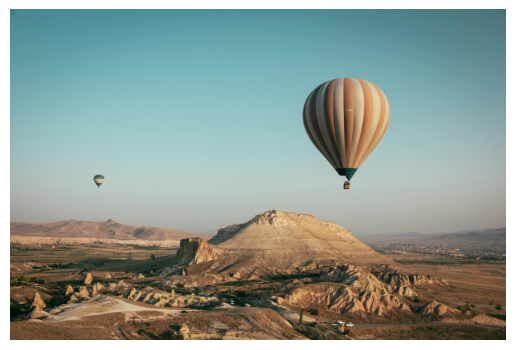

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Step 2: Display the image
image_path = "pexels_images/nature_1.jpg"  # Path to the downloaded image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()